<a href="https://colab.research.google.com/github/Steffenanderson/Machine-Learning-Exercises/blob/main/Logistic_Regression_Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression - Breast Cancer Wisconsin

The data is from the Breast Cancer Wisconsin (Diagnostic) dataset. The goal of this prediction is to successfully classify cancer as malignat (1) or benign (0).

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Models/Classification/Logistic Regression/1613245872__wisconsinBreastCancer (2).csv')
df.head().T

,0,1,2,3,4
id,842302.000000,842517.000000,8.430090e+07,8.434830e+07,8.435840e+07
diagnosis,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
radius_mean,17.990000,20.570000,1.969000e+01,1.142000e+01,2.029000e+01
texture_mean,10.380000,17.770000,2.125000e+01,2.038000e+01,1.434000e+01
perimeter_mean,122.800000,132.900000,1.300000e+02,7.758000e+01,1.351000e+02
area_mean,1001.000000,1326.000000,1.203000e+03,3.861000e+02,1.297000e+03
smoothness_mean,0.118400,0.084740,1.096000e-01,1.425000e-01,1.003000e-01
compactness_mean,0.277600,0.078640,1.599000e-01,2.839000e-01,1.328000e-01
concavity_mean,0.300100,0.086900,1.974000e-01,2.414000e-01,1.980000e-01
concave points_mean,0.147100,0.070170,1.279000e-01,1.052000e-01,1.043000e-01


**Relationship between concave points_worst and diagnosis (target)**

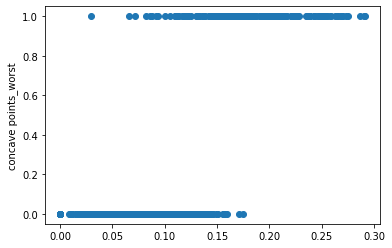

In [ ]:
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.ylabel('maligant (1) or beign (0)')
plt.ylabel('concave points_worst');

# Linear regression attempt to classify data

Linear regression was good when we wanted to predict a continuous value. This section is just showing trying using linear regression to classify and see where it falls short. malignant (1 in the graph above) or benign (0 in the graph below).

In [ ]:
X = df[['concave points_worst']]
y = df['diagnosis']

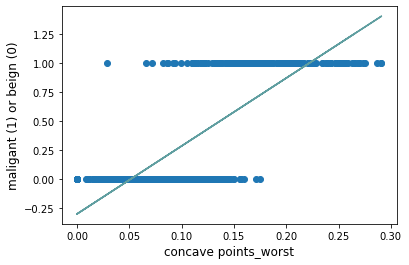

In [ ]:
# linear regression instance
lr = LinearRegression()
# fit the model
lr.fit(X,y)
predictions = lr.predict(X)
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.plot(df['concave points_worst'], predictions, color='cadetblue')
plt.ylabel('maligant (1) or beign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12);

Problem: If the value for worse_concave_points is .0, what does it mean when we have -.25 for our class instead of a 1 or zero?  
Solution: Constrain predictions between 0 and 1.

# Logistic Regression

In [ ]:
# logistic regression instance
logreg = LogisticRegression(C=1000)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# scale 
scaler = StandardScaler()
# fit the training set
scaler.fit(X_train)
# apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('y_test sum:', np.sum(y_test))
print('X_test sum:', np.sum(X_test))
print('y_train sum:', np.sum(y_train))
print('X_train sum:', np.sum(X_train))

y_test sum: 53
X_test sum: -16.92945581674113
y_train sum: 159
X_train sum: -1.2256862191861728e-13


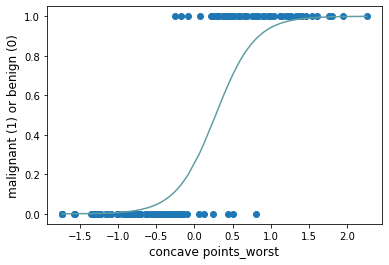

In [ ]:
# This code is to plot/visualize the predictions
example_df = pd.DataFrame(data = {'worst_concave_points': X_test.flatten(),
                     'diagnosis': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

plt.scatter(example_df['worst_concave_points'], example_df['diagnosis'])
plt.plot(example_df['worst_concave_points'], example_df['logistic_preds'].values, color='cadetblue')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12);

The predicted probabilities are now more calibrated so now you can predict either a 0 or a 1 depending on the of worse_concave_points.